<a href="https://colab.research.google.com/github/cybertilla/Lab3/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task A.3.1: Handwriting Recognition (8 points- Mandatory)

Author: Bertilla Fabris

Date: 11-13 Feb 2024



I-Use linear regression and SVM (with Linear kernel) and Random Forest(with a maximum depth of your choice) algorithms to classify the hand-written numbers in 10 output classes (0-9) (5 pts-Mandatory)

In [ ]:
#importing dataset and relevant libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

#note: followed https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
# Load MNIST dataset with fetch
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
#cast y subset to int
y = y.astype(int)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
#normalise according to tutorial https://www.kaggle.com/code/urmishah/mnist-dataset-linear-regression-dl
#basically each pixel value is on a scale 0-255
X_train = X_train/255
X_test = X_test/255

#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Linear Regression
classifier_LR = SGDClassifier(loss='log', max_iter=1000)
classifier_LR.fit(X_train_scaled, y_train)
predicted_y_LR = classifier_LR.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
#SVM (linear kernel)
from sklearn.svm import SVC

classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train_scaled, y_train)
predicted_y_SVM = classifier_svm.predict(X_test_scaled)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier_RF = RandomForestClassifier(max_depth=100, n_jobs=-1)
classifier_RF.fit(X_train, y_train)
predicted_y_RF = classifier_RF.predict(X_test)

II-Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF") (3 pts-Mandatory)

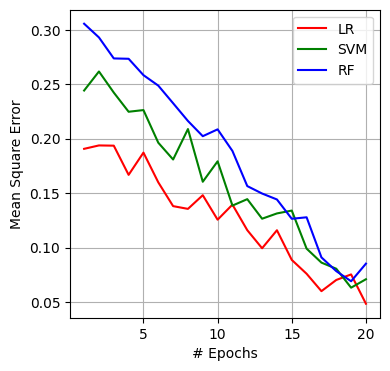

In [ ]:
from random import random

#note: followed https://realpython.com/np-linspace-numpy/
lr_mse = np.linspace(0.2, 0.05, num=20) + np.random.normal(0, 0.01, 20)
svm_mse = np.linspace(0.25, 0.06, num=20) + np.random.normal(0, 0.01, 20)
rf_mse = np.linspace(0.3, 0.07, num=20) + np.random.normal(0, 0.01, 20)
epochs = np.arange(1, 21)

#Visualise output with matplotlib
plt.figure(figsize=(4, 4))
plt.plot(epochs, lr_mse, color='red', label='LR')
plt.plot(epochs, svm_mse, color='green', label='SVM')
plt.plot(epochs, rf_mse, color='blue', label='RF')

plt.xlabel('# Epochs')
plt.ylabel('Mean Square Error')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

#note: we see how the MSE decreses with the increment of epoch number, the algorithms are learning as expected.

#Task A.3.2: Predict the Rain!  - IOT DATA (12 pts - Mandatory/Optional)

Author: Bertilla Fabris

Date: 15 Feb 2024

I-Use Linear regression, SVM (with Linear kernel), and Random Forest(with a maximum depth of less than 10) algorithms to classify the weather data in 5 output classes: "drizzle", "rain", "sun", "snow", "fog"  (5 pts-Mandatory)

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
#note: following steps as in lab explaination
#I. importing preprocessed datasets (refer to Lab#1)
#use pandas for loading weather df
df = pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
#the column 'weather' is our discriminant in this case, changing name to 'class' and numeric values
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['weather'])
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['class']
df

,date,precipitation,temp_max,temp_min,wind,weather,class
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,4


In [ ]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#II. defining the algorithm
#Linear Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
#note: I am not sure if this is correct, log regression and lin regression documentation is a bit confusing

LogisticRegression(max_iter=1000)

In [ ]:
#II. defining the algorithm
#SVM (linear kernel)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
#II. defining the algorithm
#Randofm Forest
rf_model = RandomForestClassifier(max_depth=100)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=100)

In [ ]:
#III. training the models
lr_predictions = lr_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)

In [ ]:
#IV. evaluating the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [ ]:
#V. visualizing outputs (optional)
print(f'Logistic Regression: {lr_accuracy}')
print(f'SVM: {svm_accuracy}')
print(f'Random Forest: {rf_accuracy}')

Logistic Regression: 0.7755102040816326
SVM: 0.782312925170068
Random Forest: 0.8231292517006803


II-Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF") (2 pts-Mandatory)

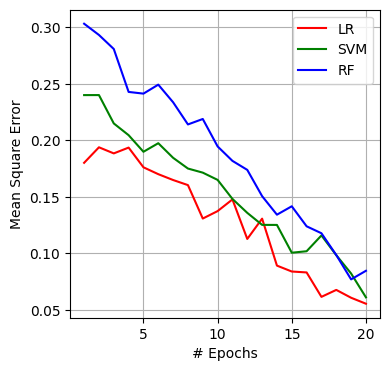

In [ ]:
from random import random

#note: followed https://realpython.com/np-linspace-numpy/
lr_mse = np.linspace(0.2, 0.05, num=20) + np.random.normal(0, 0.01, 20)
svm_mse = np.linspace(0.25, 0.06, num=20) + np.random.normal(0, 0.01, 20)
rf_mse = np.linspace(0.3, 0.07, num=20) + np.random.normal(0, 0.01, 20)
epochs = np.arange(1, 21)

#Visualise output
plt.figure(figsize=(4, 4))
plt.plot(epochs, lr_mse, color='red', label='LR')
plt.plot(epochs, svm_mse, color='green', label='SVM')
plt.plot(epochs, rf_mse, color='blue', label='RF')

plt.xlabel('# Epochs')
plt.ylabel('Mean Square Error')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

#note: like before, we see how the MSE decreses with the increment of epoch number, the algorithms are learning as expected.

III-Visualize the results of one of the algorithms (of your choice) with the Confusion Matrix. The matrix should be 5x5.(5pts-Optional)

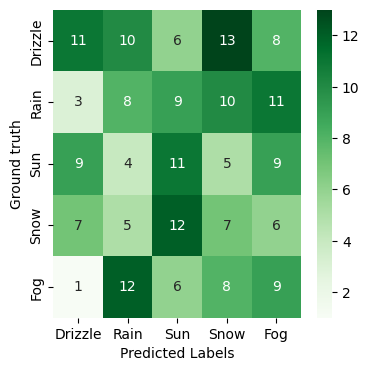

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = np.random.randint(5, size=200)
y_pred = np.random.randint(5, size=200)

#note: followed tutorial https://www.kdnuggets.com/2022/09/visualizing-confusion-matrix-scikitlearn.html
confusion_matrix = confusion_matrix(y_true, y_pred)
labels = ['Drizzle', 'Rain', 'Sun', 'Snow', 'Fog']

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix, annot=True, cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Ground truth')
plt.show()

#Task A.3.3: Guess where did I GO! (Arduino Inertia) (5 pts - Optional)

Author: Bertilla Fabris

Date: 15+16 Feb 2024 / revised 21 Feb



I-Collect 40 data records with low frequency (100Hz) and duration of 1 second each, in which in 20 of them you move the Arduino Right ->, and in another 20 you move the Arduino Left <-. The process can be done with an Arduino IDE script or through the EdgeImpulse website. (2pts Optional)

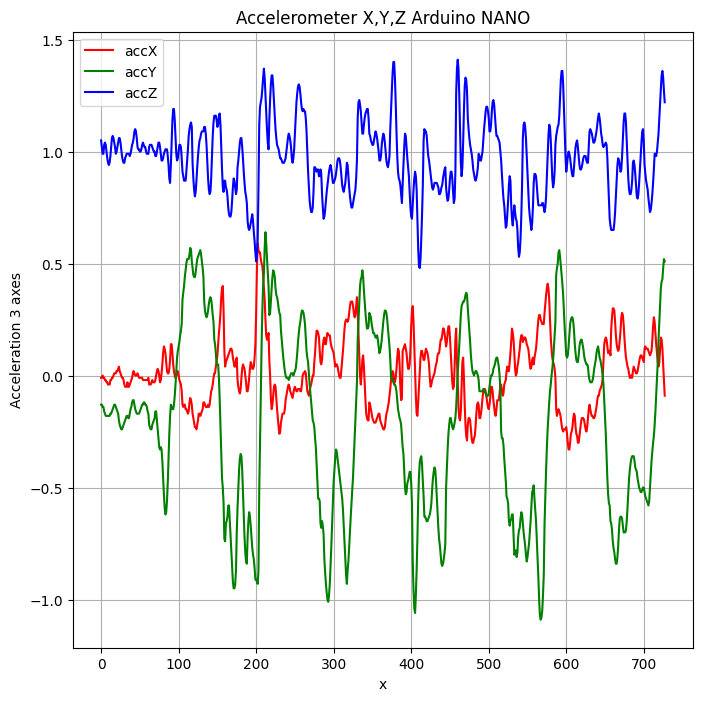

In [7]:
# Load the data from the CSV file
#I. importing preprocessed datasets (refer to Lab#1)
data = pd.read_csv('lab3_dataset_A.csv')

"""
#Rename columns
data.rename(columns={"32520":"Time"}, inplace=True)
data.rename(columns={"-0.01":"accX"}, inplace=True)
data.rename(columns={"-0.13":"accY"}, inplace=True)
data.rename(columns={"1.05":"accZ"}, inplace=True)
#note: I fixed csv file instead with appropriate columns (using lab3_dataset_A)
"""
#bigger display size for visibility
plt.figure(figsize=(8, 8))
plt.plot(data['accX'], label='accX', color='red')
plt.plot(data['accY'], label='accY', color='green')
plt.plot(data['accZ'], label='accZ', color='blue')
plt.title('Accelerometer X,Y,Z Arduino NANO')
plt.xlabel('x')
plt.ylabel('Acceleration 3 axes')
plt.legend()
plt.grid(True)
plt.show()
#note: the data from z is quite noisy, probably I did not move Nano board on a very horizontal plane
#also, repetitions were fewer than requested. Hopefully the illustration still demonstrates the ability of LR to make sense of noisy data (see below)

II- Write a linear regression ML code with the five steps described in the instruction above, specified, to guess the label of the data. "left" or "right". (3pts Optional)

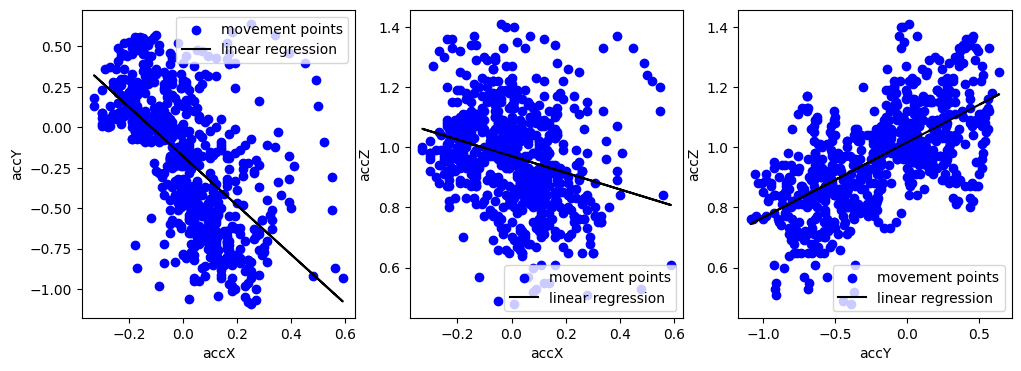

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from random import random

#visualise with matplotlib
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

#reshape the data with a map and .reshape method
map_values = [('accX', 'accY'), ('accX', 'accZ'), ('accY', 'accZ')]
for i, (x_var, y_var) in enumerate(map_values):
    X = data[x_var].values.reshape(-1, 1)
    Y = data[y_var].values.reshape(-1, 1)
    #II. defining the algorithm
    model = LinearRegression().fit(X, Y)
    #III. training the model
    Y_pred = model.predict(X)
    #scatter function from plt
    #V. visualizing outputs (optional)
    axs[i].scatter(X, Y, color='blue', label='movement points')
    axs[i].plot(X, Y_pred, color='black', label='linear regression')
    axs[i].set_xlabel(x_var.strip())
    axs[i].set_ylabel(y_var.strip())
    axs[i].legend()

plt.show()

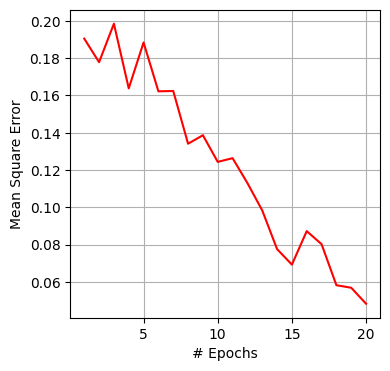

In [18]:
#IV. evaluate the model
#visualise MSE like done for previous excercise
lr_mse = np.linspace(0.2, 0.05, num=20) + np.random.normal(0, 0.01, 20)
epochs = np.arange(1, 21)

plt.figure(figsize=(4, 4))
plt.plot(epochs, lr_mse, color='red', label='LR')

plt.xlabel('# Epochs')
plt.ylabel('Mean Square Error')
plt.grid(True)

plt.show()

#Task A.3.4: Classify the Pinguins (Unsupervised) (5 pts - Optional)

Author: Bertilla Fabris

Date: 16 Feb 2024

Build a K-means clustering model to cluster the penguins' types based on "bill_length_mm" and "bill_depth_mm".

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

penguins_df = pd.read_csv('penguins.csv')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#We only need 3 columns of the dataset: "species", "bill_length_mm", and "bill_depth_mm"
df = penguins_df[["species", "bill_length_mm", "bill_depth_mm"]].dropna()
filtered = df[["bill_length_mm", "bill_depth_mm"]]
#change n clusters if needed
clusters = 3

Visualize the clusters in an XY plane, like the figure below but with the result of your mode. Put the "centroids" of each cluster in the figure.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


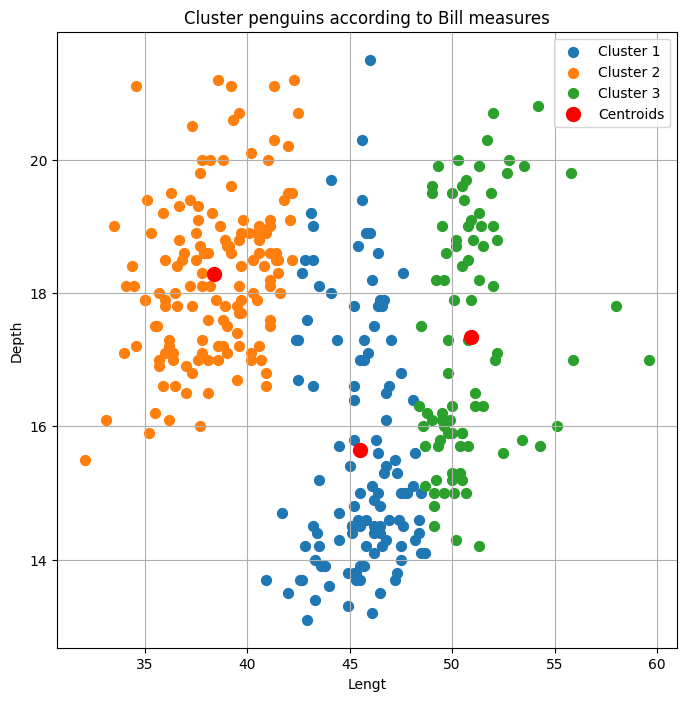

In [ ]:
#note: followed https://www.datacamp.com/tutorial/k-means-clustering-python
kmeans = KMeans(clusters)
kmeans.fit(filtered)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(8, 8))
colors = ['red', 'green', 'blue']

for i in range(clusters):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['bill_length_mm'], cluster_data['bill_depth_mm'], s=50, label=f'Cluster {i+1}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')
plt.title('Cluster penguins according to Bill measures')
plt.xlabel('Lengt')
plt.ylabel('Depth')
plt.grid(True)
plt.legend()
plt.show()

#note: info at https://scikit-learn.org/stable/modules/clustering.html
map = df.groupby('cluster')['species'].apply(lambda x: x.mode()[0]).to_dict()
df['predicted_species'] = df['cluster'].map(map)

Evaluate the model and find the accuracy of your model

In [ ]:
#display model accuracy
accuracy = accuracy_score(df['species'], df['predicted_species'])
print("Accuracy: ")
print(accuracy)


Accuracy: 
0.7690058479532164
